# Data Mining Image Analysis

In [1]:
!pip install -q opencv-python
!pip install -q matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def get_pixel(img, center, x, y, height, width):
    new_value = 0
    if 0 <= x < height and 0 <= y < width:
        if img[x][y] >= center:
            new_value = 1
    return new_value

def lbp_calculated_pixel(img, x, y, height, width):
    """
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4
    """
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1, height, width))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1, height, width))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1, height, width))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y, height, width))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1, height, width))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1, height, width))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1, height, width))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y, height, width))       # top

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(15, 5))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap='gray')
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

def plot_lbp(image_file):
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    img_lbp = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j, height, width)

    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program is finished")


/tmp/ipykernel_7823/2116330599.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_plot.set_yticklabels(ytick_list, rotation=90)


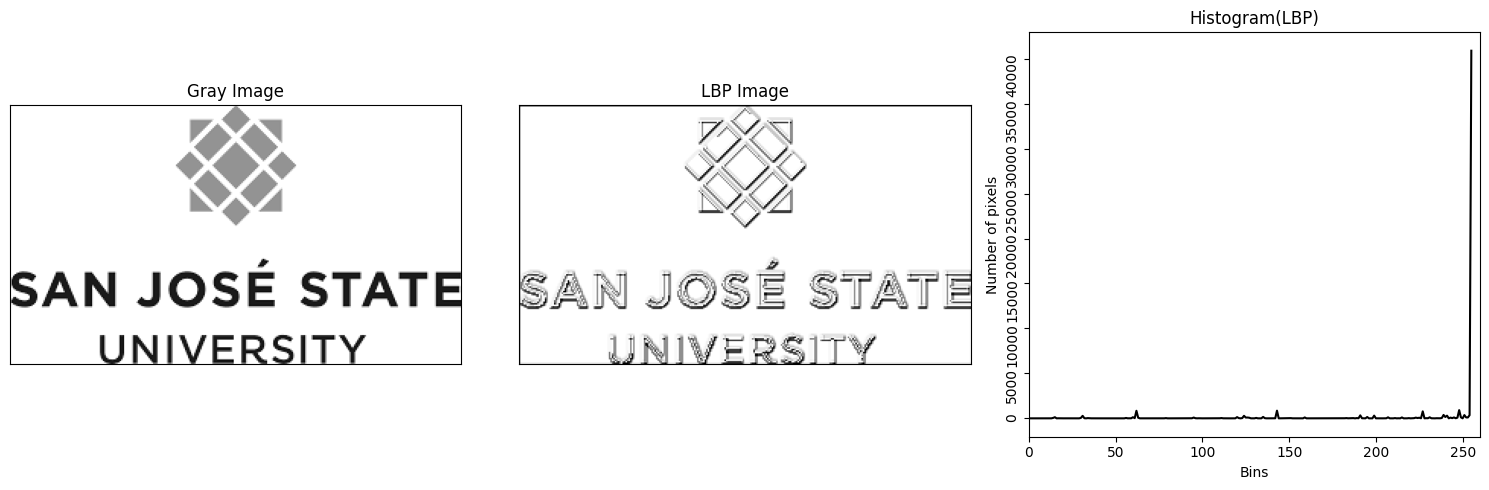

LBP Program is finished


/tmp/ipykernel_7823/2116330599.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_plot.set_yticklabels(ytick_list, rotation=90)


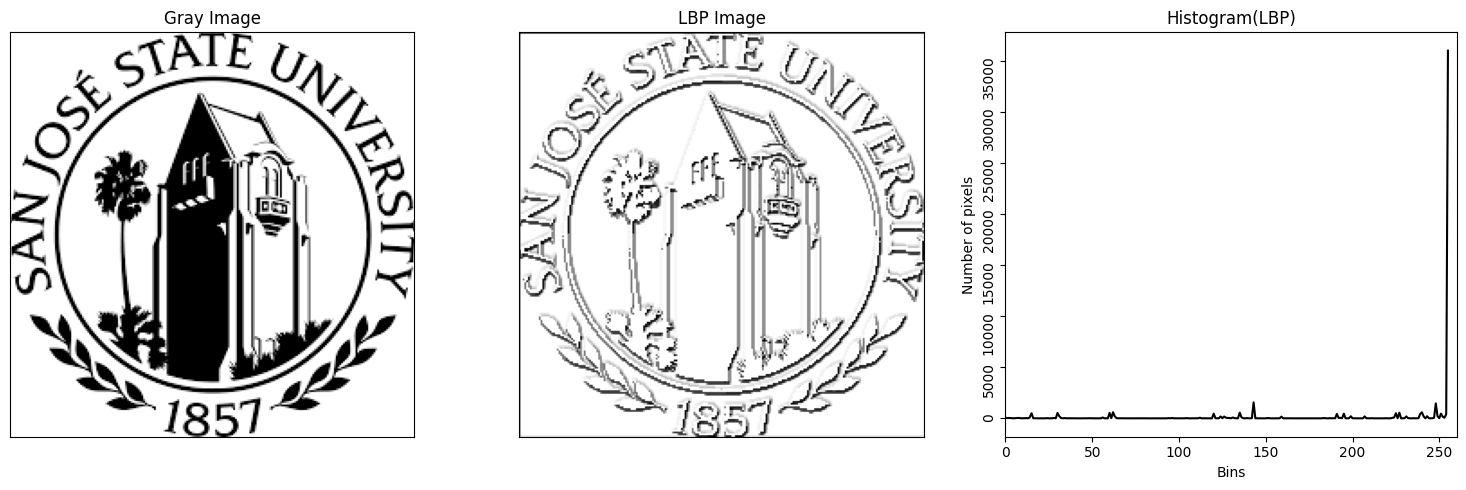

LBP Program is finished


/tmp/ipykernel_7823/2116330599.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_plot.set_yticklabels(ytick_list, rotation=90)


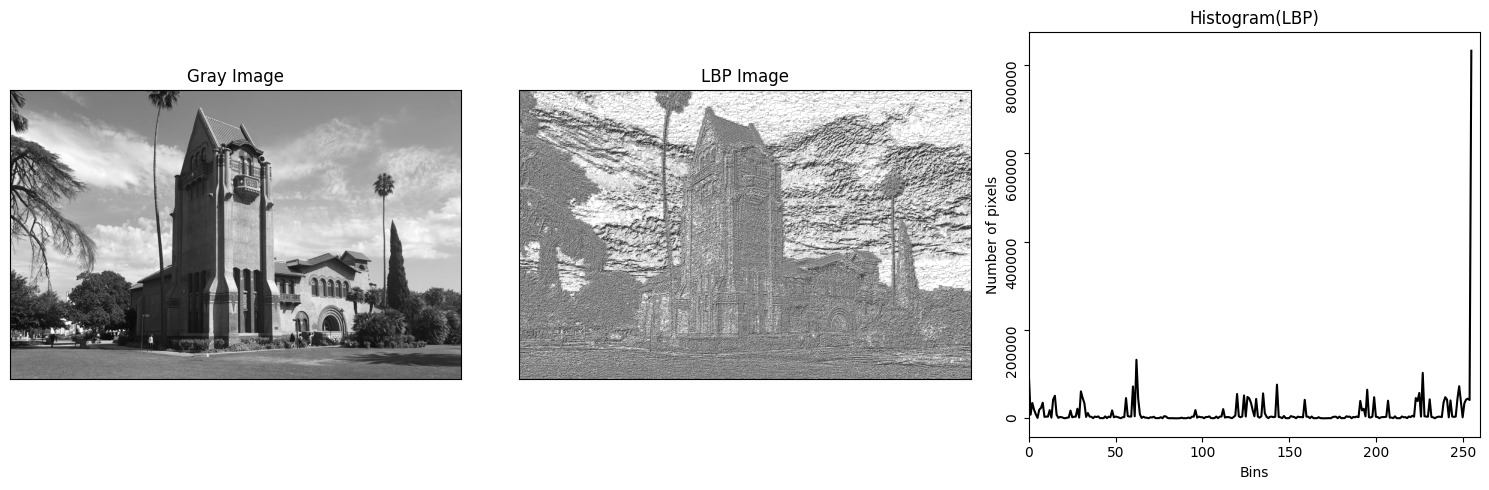

LBP Program is finished


In [7]:
plot_lbp("SJSU.png")
plot_lbp("SJSU_2.png")
plot_lbp("SJSU_3.png")